In [2]:
TRAIN_PATH = "Train"
VAL_PATH = "TEST"

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [3]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))  #Conv layer with 32 Filters of size(3x3),relu activation function 
model.add(Conv2D(64,(3,3),activation='relu'))                                      #2nd Conv layer with 64 Filters of size(3x3),relu activation function
model.add(MaxPooling2D(pool_size=(2,2)))                                           #Max Pooling layer of size 2x2
model.add(Dropout(0.25))                                                           #Dropout prevents overfitting of network

model.add(Conv2D(64,(3,3),activation='relu'))                                      #3rd Conv layer with 64 filters
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))                                     #4th Conv Layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Dense Layers/Fully connected layers

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [5]:
# Train
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,                         #Rescaling image from large number to small ,to become work of Gradient desent easy 
    shear_range = 0.2,                        #shear_range is for randomly applying shearing transformations
    zoom_range = 0.2,                         #zoom_range is for randomly zooming inside pictures
    horizontal_flip = True,                   #horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(         
    'Train',
    target_size = (224,224), #Resize input image to 224x224
    batch_size = 32,         #The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model's internal parameters are updated.
    class_mode = 'binary')

Found 304 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1}

In [8]:
#Test function
validation_generator = test_dataset.flow_from_directory(
    'TEST',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 56 images belonging to 2 classes.


In [9]:
hist = model.fit(
    train_generator,           
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 43s 5s/step - loss: 1.2806 - accuracy: 0.5875 - val_loss: 0.6839 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 0.5961 - accuracy: 0.7042 - val_loss: 0.5820 - val_accuracy: 0.9464
Epoch 3/10
8/8 [==============================] - 36s 5s/step - loss: 0.4557 - accuracy: 0.8083 - val_loss: 0.4465 - val_accuracy: 0.9107
Epoch 4/10
8/8 [==============================] - 38s 5s/step - loss: 0.3821 - accuracy: 0.8333 - val_loss: 0.3632 - val_accuracy: 0.9643
Epoch 5/10
8/8 [==============================] - 38s 5s/step - loss: 0.2826 - accuracy: 0.8792 - val_loss: 0.2253 - val_accuracy: 0.9286
Epoch 6/10
8/8 [==============================] - 38s 5s/step - loss: 0.2346 - accuracy: 0.9125 - val_loss: 0.1427 - val_accuracy: 0.9643
Epoch 7/10
8/8 [==============================] - 39s 5s/step - loss: 0.1935 - accuracy: 0.9453 - val_loss: 0.1584 - val_accuracy: 0.9464
Epoch 8/10
8/8 [==================

In [10]:
model.save("TestedAndTrainedModel.h5")

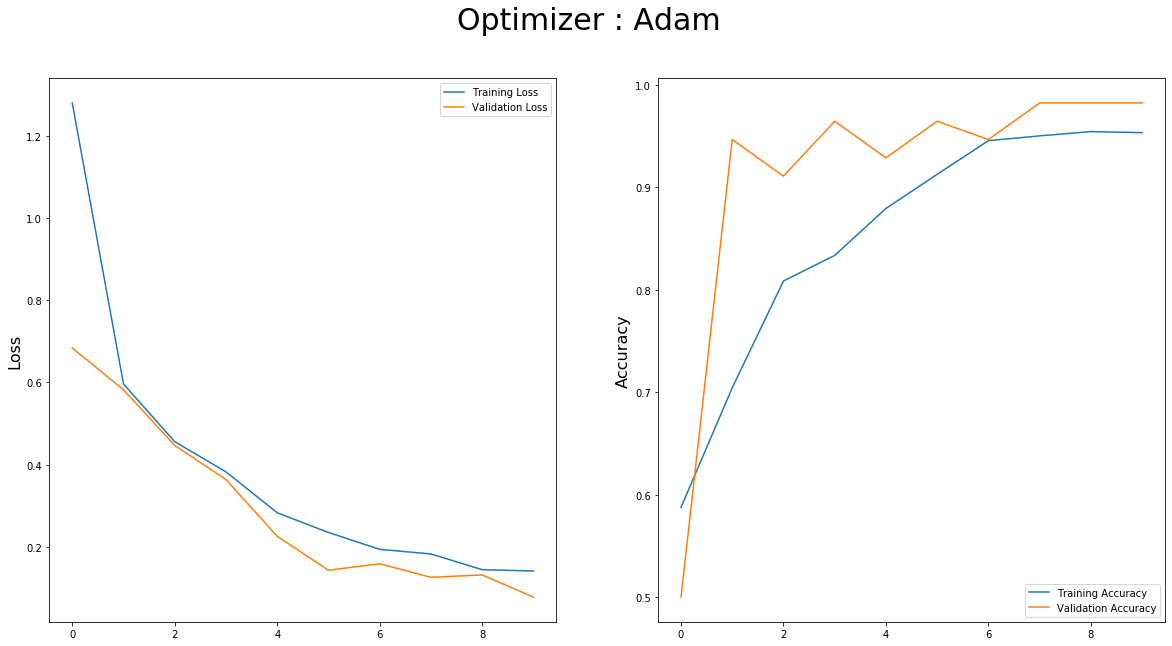

In [12]:
#ploting the LOSS and ACCURACY
history=hist
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=30)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()